ADS Assignment 2
Titanic Ship Case Study
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding 
with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
 One of the reasons that the shipwreck led to such loss of life was that there were not 
enough lifeboats for the passengers and crew.
 Although there was some element of luck involved in surviving the sinking, some groups of 
people were more likely to survive than others, such as women, children, and the upperclass.
The problem associated with the Titanic dataset is to predict whether a passenger survived the 
disaster or not. The dataset contains various features such as passenger class, age, gender, 
cabin, fare, and whether the passenger had any siblings or spouses on board. These features can 
be used to build a predictive model to determine the likelihood of a passenger surviving the 
disaster. The dataset offers opportunities for feature engineering, data visualization, and model 
selection, making it a valuable resource for developing and testing data analysis and machine 
learning skills.
Perform Below Tasks to complete the assignment:-
1. Download the dataset: Dataset
2. Load the dataset.
3. Perform Below Visualizations.
● Univariate Analysis
● Bi - Variate Analysis
● Multi - Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [1]:
import pandas as pd

df = pd.read_csv("titanic.csv")

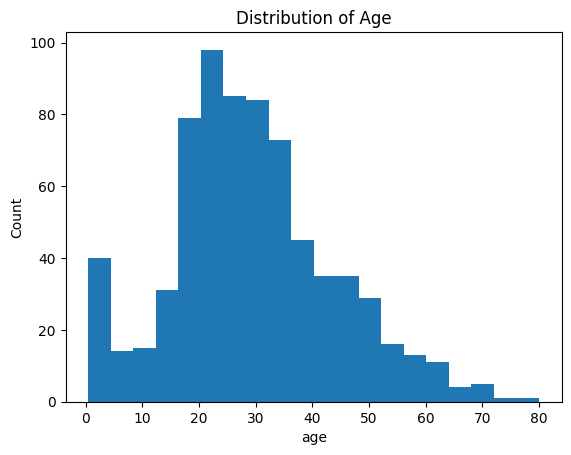

In [6]:
import matplotlib.pyplot as plt

# Histogram of Age
plt.hist(df['age'].dropna(), bins=20)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

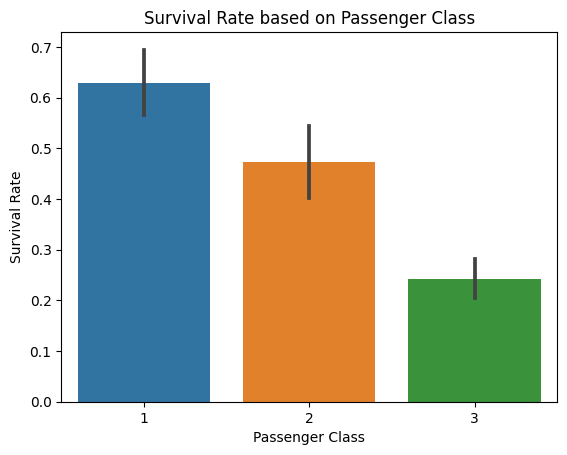

In [7]:
import seaborn as sns

# Bar plot of survival rate based on passenger class
sns.barplot(x='pclass', y='survived', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate based on Passenger Class')
plt.show()


In [9]:
# Descriptive statistics
print(df.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [12]:
# Drop rows with missing values
df.dropna(inplace=True)
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000
mean     0.675824    1.192308   35.623187    0.467033    0.478022   78.919735
std      0.469357    0.516411   15.671615    0.645007    0.755869   76.490774
min      0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   24.000000    0.000000    0.000000   29.700000
50%      1.000000    1.000000   36.000000    0.000000    0.000000   57.000000
75%      1.000000    1.000000   47.750000    1.000000    1.000000   90.000000
max      1.000000    3.000000   80.000000    3.000000    4.000000  512.329200


In [14]:
# Replace outliers in Age with the median
median_age = df['age'].median()
df.loc[df['age'] > 70, 'age'] = median_age


In [16]:
# One-hot encoding of the Sex column
df = pd.get_dummies(df, columns=['sex'], drop_first=True)


In [17]:
# Splitting into dependent (y) and independent (X) variables
X = df.drop('survived', axis=1)
y = df['survived']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)